In [6]:
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ckpt_path = "/home/azureuser/saved_models/ligo-bert-2steps/sqrtlarge-hf-finetune-100steps-nowarmup-bsz512-lr2e-5-eyeinit-notie-avg-fullA-val20-base1e-4/finetune-100steps-nowarmup-bsz512-lr2e-5-eyeinit-notie-avg-fullA-val20-base1e-4/epoch1_step100"

In [8]:
model_ckpt = torch.load(os.path.join(ckpt_path, "pytorch_model.bin"))

In [9]:
model_ckpt.keys()

odict_keys(['bert.embeddings.word_embeddings.parametrizations.weight.original', 'bert.embeddings.word_embeddings.parametrizations.weight.0.src_weight_0', 'bert.embeddings.word_embeddings.parametrizations.weight.0.src_weight_1', 'bert.embeddings.word_embeddings.parametrizations.weight.0.ligo_b.0', 'bert.embeddings.word_embeddings.parametrizations.weight.0.ligo_b.1', 'bert.embeddings.position_embeddings.parametrizations.weight.original', 'bert.embeddings.position_embeddings.parametrizations.weight.0.src_weight_0', 'bert.embeddings.position_embeddings.parametrizations.weight.0.src_weight_1', 'bert.embeddings.position_embeddings.parametrizations.weight.0.ligo_b.0', 'bert.embeddings.position_embeddings.parametrizations.weight.0.ligo_b.1', 'bert.embeddings.token_type_embeddings.parametrizations.weight.original', 'bert.embeddings.token_type_embeddings.parametrizations.weight.0.src_weight_0', 'bert.embeddings.token_type_embeddings.parametrizations.weight.0.src_weight_1', 'bert.embeddings.token

In [14]:
out_expand_1 = model_ckpt['bert.encoder.layer.0.attention.output.dense.parametrizations.weight.0.ligo_b.0'].detach().cpu()
out_expand_2 = model_ckpt['bert.encoder.layer.0.attention.output.dense.parametrizations.weight.0.ligo_b.1'].detach().cpu()
out_expand_1.shape, out_expand_2.shape

(torch.Size([768, 512]), torch.Size([768, 512]))

In [24]:
tgt_out_dim, src_out_dim = out_expand_1.shape

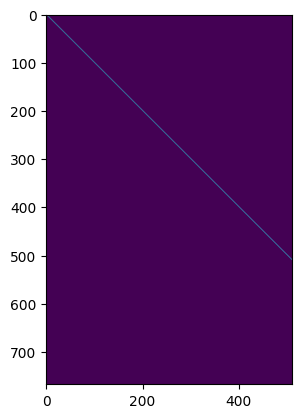

In [15]:
plt.imshow(out_expand_1)

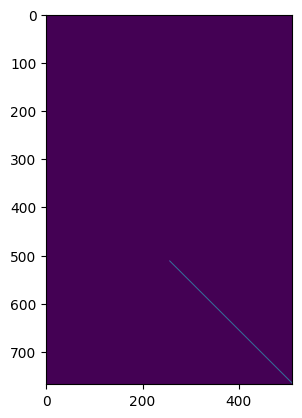

In [20]:
plt.imshow(out_expand_2)

<Axes: >

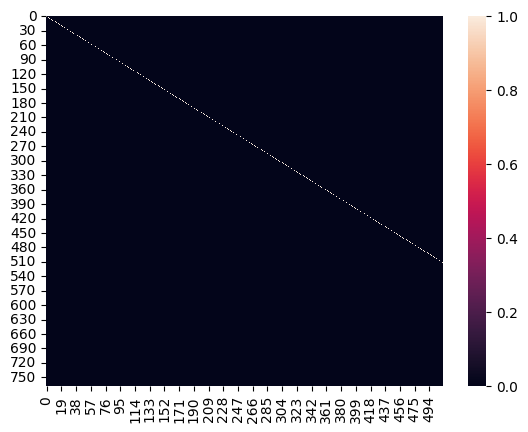

In [18]:
sns.heatmap(out_expand_1)

<Axes: >

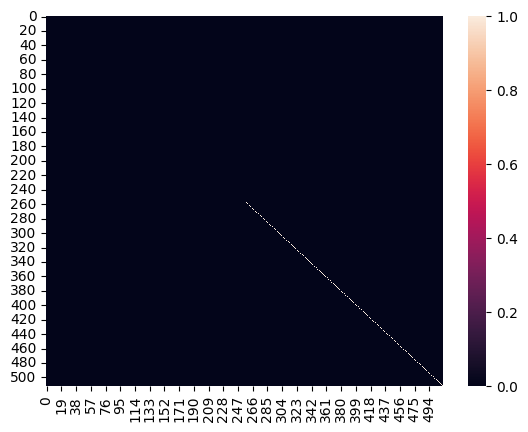

: 

In [25]:
sns.heatmap(out_expand_2[-src_out_dim:,-src_out_dim:])

In [22]:
out_expand_1

tensor([[ 9.9994e-01, -2.5867e-05, -7.8082e-06,  ..., -2.6246e-05,
         -2.2615e-05, -2.5089e-05],
        [-1.9826e-07,  1.0000e+00,  2.1508e-05,  ...,  1.8654e-05,
          6.1599e-06,  4.3107e-05],
        [ 6.9991e-05,  1.0177e-04,  1.0000e+00,  ...,  9.4257e-05,
          8.4460e-05,  6.9079e-05],
        ...,
        [-1.2046e-04, -1.3628e-04, -1.5738e-04,  ..., -1.5699e-04,
         -2.0293e-04, -1.3224e-04],
        [ 1.4762e-04,  1.2034e-04,  9.5188e-05,  ...,  8.3742e-05,
          9.3180e-05,  1.3113e-04],
        [-7.9146e-05, -6.7323e-05, -2.6399e-05,  ..., -5.2066e-06,
         -3.3080e-05, -6.9352e-05]])